In [14]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from pathlib import Path
import pandas as pd
from typing import Any

In [15]:
DATA = Path('./data/funds/广发道琼斯石油指数人民币A-162719.csv')

In [16]:
df = pd.read_csv(DATA, index_col=0, parse_dates=['date'])

In [17]:
df['delta'] = df.value - df.value.shift(periods=1, fill_value=1.)  # 标签为增量
df['delta_percent'] = df['delta'] / df.value.shift(periods=1, fill_value=1.) * 100
df = df.iloc[-240 * 4:]  # 最长展示 4 年,除去交易停止日
df.reset_index(drop=True, inplace=True)
vline_day = [df.date.iloc[-i] for i in [240, 20, 5]]  # 插入三根垂直线 周 月 年,除去双休日
df.value.quantile([0.3, 0.7])  # 插入两根水平线 0.3 0.7
hline_value = df.value.quantile([0.3, 0.7]).tolist()
txt_df = df.iloc[::-20]  # 加入标签 每隔 1 个月
txt = {'x': txt_df.date.tolist(), 'y': txt_df.value.tolist(),
'label': txt_df.apply(lambda row: f'{row["delta_percent"]:.2f}%', axis=1).tolist()}


In [18]:
df.head()

,date,value,delta,delta_percent
0,2018-12-21,0.8519,-0.0146,-1.684939
1,2018-12-24,0.8157,-0.0362,-4.249325
2,2018-12-26,0.8771,0.0614,7.527277
3,2018-12-27,0.8837,0.0066,0.752480
4,2018-12-28,0.8681,-0.0156,-1.765305


In [65]:
class Colors:
    def __init__(self, cmap, cycle=None) -> None:
        self.cmap = mpl.colormaps[cmap]
        if cycle:
            self.cycle = cycle
            self.colors = self.cmap.resampled(cycle)
        else:
            self.cycle = len(self.cmap.colors)
        self.iter = iter(range(self.cycle))
    def __call__(self, *args: Any, **kwds: Any):
        return self.cmap(*args, **kwds)
    def __next__(self):
        try:
            return self.cmap(next(self.iter))
        except:
            self.iter = iter(range(self.cycle))
            return self.cmap(next(self.iter))


In [87]:
for x, y in zip(txt[''].items():
    print(x, y)
    break

x [Timestamp('2022-12-07 00:00:00'), Timestamp('2022-11-09 00:00:00'), Timestamp('2022-10-12 00:00:00'), Timestamp('2022-09-06 00:00:00'), Timestamp('2022-08-09 00:00:00'), Timestamp('2022-07-12 00:00:00'), Timestamp('2022-06-14 00:00:00'), Timestamp('2022-05-16 00:00:00'), Timestamp('2022-04-13 00:00:00'), Timestamp('2022-03-14 00:00:00'), Timestamp('2022-02-14 00:00:00'), Timestamp('2022-01-10 00:00:00'), Timestamp('2021-12-10 00:00:00'), Timestamp('2021-11-12 00:00:00'), Timestamp('2021-10-15 00:00:00'), Timestamp('2021-09-08 00:00:00'), Timestamp('2021-08-11 00:00:00'), Timestamp('2021-07-14 00:00:00'), Timestamp('2021-06-16 00:00:00'), Timestamp('2021-05-18 00:00:00'), Timestamp('2021-04-15 00:00:00'), Timestamp('2021-03-17 00:00:00'), Timestamp('2021-02-10 00:00:00'), Timestamp('2021-01-13 00:00:00'), Timestamp('2020-12-15 00:00:00'), Timestamp('2020-11-17 00:00:00'), Timestamp('2020-10-20 00:00:00'), Timestamp('2020-09-14 00:00:00'), Timestamp('2020-08-17 00:00:00'), Timestamp('

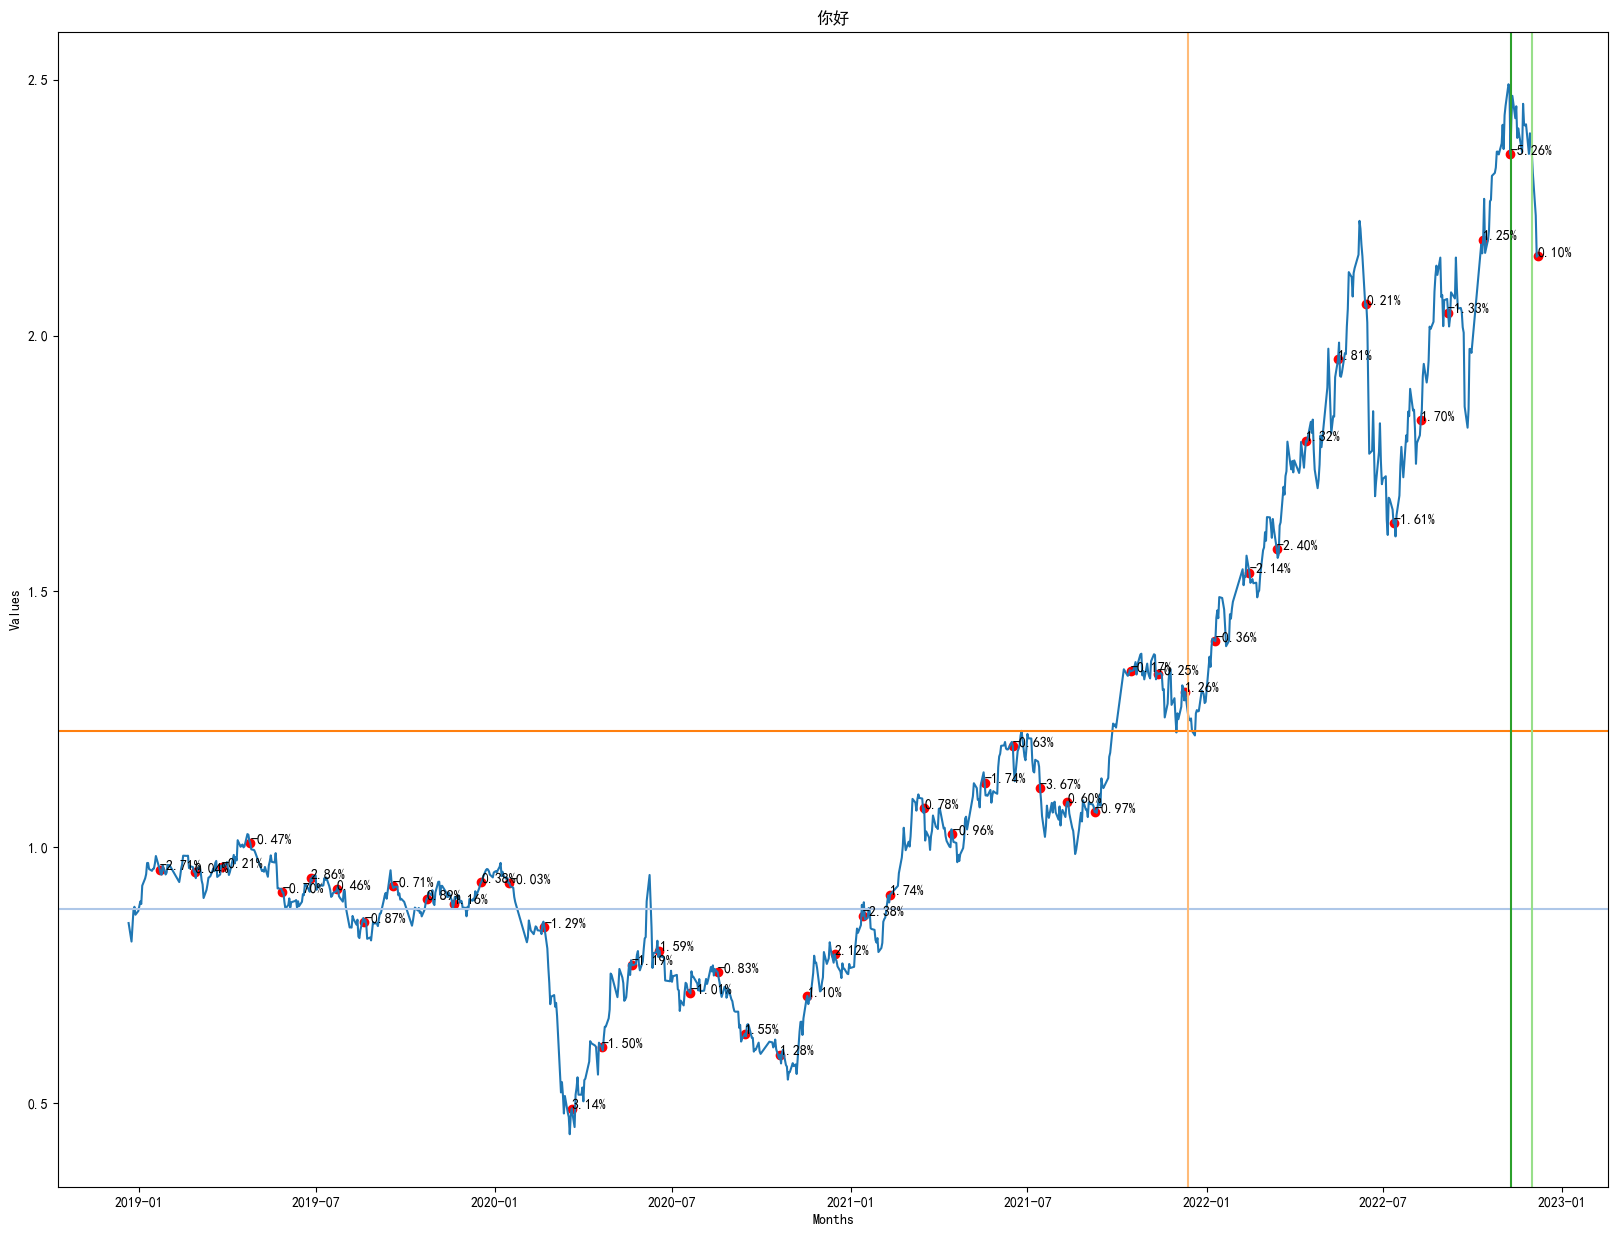

In [89]:
cmap = Colors('tab20')
plt.rcParams['font.family'] = 'SimHei'
fig, ax = plt.subplots(figsize=(20, 15))
plt.plot('date', 'value', data=df, c=next(cmap))
for hline in hline_value:
    plt.axhline(y=hline, c=next(cmap))
for vline in vline_day:
    plt.axvline(x=vline, c=next(cmap))
plt.scatter('x', 'y', data=txt, c='r')
for x, y, t in zip(txt['x'], txt['y'], txt['label']):
    plt.text(x, y, t)
plt.xlabel("Months")
plt.ylabel("Values")
plt.title("你好")
plt.show()
